In [92]:
import json

In [93]:
# Convert both gpt and blip signs to preds
# with open("data/Throat_Sign_Labels/blip2_val_signs.json") as f:
with open("data/Throat_Sign_Labels/gpt_val_signs.json") as f:
    preds = json.load(f)



In [94]:
# Binarising outputs as either not present (NAD in string) or present for validation
for entry in preds:
    preds[entry]["Tonsillar Exudate"] = not ("NAD" in preds[entry]["Tonsillar Exudate"])
    preds[entry]["Tonsillar Swelling"] = not ("NAD" in preds[entry]["Tonsillar Swelling"])
    preds[entry]["Uvula Deviation"] = not ("NAD" in preds[entry]["Uvula Deviation"])
    preds[entry]["Erythema"] = not ("NAD" in preds[entry]["Erythema"])
    preds[entry]["Ulcers"] = not ("NAD" in preds[entry]["Ulcers"])

In [95]:

out_data = json.dumps(preds, indent=4)
with open("data/gpt_preds.json", "w") as f:
    f.write(out_data)

In [112]:
with open("data/Throat_Sign_Labels/gpt_preds.json") as f:
    gpt_preds = json.load(f)

with open("data/Throat_Sign_Labels/blip2_preds.json") as f:
    preds = json.load(f)

with open("data/Throat_Sign_Labels/dr1-val.json") as f:
    labels = json.load(f)

with open("data/Throat_Sign_Labels/dr2-val.json") as f:
    s_labels = json.load(f)



In [113]:

def shorten_filename(labels):
    temp = {}

    for key, value in labels.items():
        # Replace "Valfolder/Class1/" with "C1_" and "Valfolder/Class0/" with "C0_"
        new_key = key.replace("Valfolder/Class1/", "C1_").replace("Valfolder/Class0/", "C0_")
        temp[new_key] = value

    labels = temp
    return labels

gpt_preds = shorten_filename(gpt_preds)
preds = shorten_filename(preds)



In [114]:
# Each filename had a random number prepended to it to shuffle order when labelling
def remove_num(labels):
    temp = {}

    for key, value in labels.items():
        # Replace "Valfolder/Class1/" with "C1_" and "Valfolder/Class0/" with "C0_"
        new_key = key.split("_",1)[1]
        temp[new_key] = value

    labels = temp
    return labels
labels = remove_num(labels)
s_labels = remove_num(s_labels)


In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calc_f1(preds, labels):
    # Initialize lists to collect true and predicted labels for each characteristic
    tonsillar_exudate_true = []
    tonsillar_exudate_pred = []
    tonsillar_swelling_true = []
    tonsillar_swelling_pred = []
    uvula_deviation_true = []
    uvula_deviation_pred = []
    erythema_true = []
    erythema_pred = []
    # ulcers_true = []
    # ulcers_pred = []

    # (Repeat for other signs)

    # Iterate over the results and labels
    for image_name, predicted_data in preds.items():
        if image_name in labels:
            label_data = labels[image_name]

            # Tonsillar Exudate
            tonsillar_exudate_true.append(label_data["Tonsillar Exudate"])
            tonsillar_exudate_pred.append(predicted_data["Tonsillar Exudate"])

            # Tonsillar Swelling
            tonsillar_swelling_true.append(label_data["Tonsillar Swelling"])
            tonsillar_swelling_pred.append(predicted_data["Tonsillar Swelling"])

            # Uvula Deviation
            uvula_deviation_true.append(label_data["Uvula Deviation"])
            uvula_deviation_pred.append(predicted_data["Uvula Deviation"])
            # Tonsillar Swelling
            erythema_true.append(label_data["Erythema"])
            erythema_pred.append(predicted_data["Erythema"])

            # (Repeat for other signs)

    # Calculate precision, recall, and F1 score for Tonsillar Exudate
    precision_exudate = precision_score(tonsillar_exudate_true, tonsillar_exudate_pred)
    recall_exudate = recall_score(tonsillar_exudate_true, tonsillar_exudate_pred)
    f1_exudate = f1_score(tonsillar_exudate_true, tonsillar_exudate_pred)

    print(f"Tonsillar Exudate - Precision: {precision_exudate:.2f}, Recall: {recall_exudate:.2f}, F1 Score: {f1_exudate:.2f}")

    # Calculate precision, recall, and F1 score for Tonsillar Exudate
    precision_swelling = precision_score(tonsillar_swelling_true, tonsillar_swelling_pred)
    recall_swelling = recall_score(tonsillar_swelling_true, tonsillar_swelling_pred)
    f1_swelling = f1_score(tonsillar_swelling_true, tonsillar_swelling_pred)

    print(f"Tonsillar swelling - Precision: {precision_swelling:.2f}, Recall: {recall_swelling:.2f}, F1 Score: {f1_swelling:.2f}")

    # Calculate precision, recall, and F1 score for Tonsillar Exudate
    precision_uvula = precision_score(uvula_deviation_true, uvula_deviation_pred)
    recall_uvula = recall_score(uvula_deviation_true, uvula_deviation_pred)
    f1_uvula = f1_score(uvula_deviation_true, uvula_deviation_pred)

    print(f"Uvula Deviation - Precision: {precision_uvula:.2f}, Recall: {recall_uvula:.2f}, F1 Score: {f1_uvula:.2f}")

    # Calculate precision, recall, and F1 score for Tonsillar Exudate
    precision_erythema = precision_score(erythema_true, erythema_pred)
    recall_erythema = recall_score(erythema_true, erythema_pred)
    f1_erythema = f1_score(erythema_true, erythema_pred)

    print(f"erythema - Precision: {precision_erythema:.2f}, Recall: {recall_erythema:.2f}, F1 Score: {f1_erythema:.2f}")

    # (Repeat for other characteristics)
    f1_scores = {
        "Tonsillar Exudate": f1_exudate,
        "Tonsillar Swelling": f1_swelling,
        "Uvula Deviation": f1_uvula,
        "Erythema": f1_erythema,
    }
    return f1_scores


blip2_f1 = calc_f1(preds, labels)
gpt_f1 = calc_f1(gpt_preds, labels)

Tonsillar Exudate - Precision: 0.71, Recall: 0.71, F1 Score: 0.71
Tonsillar swelling - Precision: 0.81, Recall: 0.78, F1 Score: 0.79
Uvula Deviation - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
erythema - Precision: 0.74, Recall: 0.63, F1 Score: 0.68
Tonsillar Exudate - Precision: 0.76, Recall: 0.81, F1 Score: 0.78
Tonsillar swelling - Precision: 0.77, Recall: 0.72, F1 Score: 0.74
Uvula Deviation - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
erythema - Precision: 0.78, Recall: 0.95, F1 Score: 0.86


/home/prasi/anaconda3/envs/strep_detect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prasi/anaconda3/envs/strep_detect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
def calc_acc(preds, labels):
    # Initialize counters for each characteristic
    accuracy = {
        "Tonsillar Exudate": {"correct": 0, "total": 0},
        "Tonsillar Swelling": {"correct": 0, "total": 0},
        "Uvula Deviation": {"correct": 0, "total": 0},
        "Erythema": {"correct": 0, "total": 0},
        "Ulcers": {"correct": 0, "total": 0}
    }

    # Iterate over the results
    for image_name, predicted_data in preds.items():
        # Get the corresponding label data
        if image_name in labels:
            label_data = labels[image_name]
            
            # Compare each characteristic and update the accuracy counters
            for characteristic in accuracy.keys():
                if characteristic in predicted_data and characteristic in label_data:
                    accuracy[characteristic]["total"] += 1
                    if predicted_data[characteristic] == label_data[characteristic]:
                        accuracy[characteristic]["correct"] += 1

    # Calculate and print the accuracy for each characteristic
    accs = {}
    for characteristic, values in accuracy.items():
        if values["total"] > 0:
            accuracy_score = values["correct"] / values["total"]
            print(f"{characteristic}: {accuracy_score:.2%}")
            accs[characteristic] = accuracy_score
        else:
            print(f"{characteristic} has no data to calculate accuracy.")
    return accs

print("Blip2")
blip2_accs = calc_acc(preds, labels)
print("GPT-4o-mini")
gpt_accs = calc_acc(gpt_preds, labels)
print("Dr. S.R.")
s_accs = calc_acc(s_labels, labels)

Blip2
Tonsillar Exudate: 67.27%
Tonsillar Swelling: 76.36%
Uvula Deviation: 94.55%
Erythema: 56.36%
Ulcers has no data to calculate accuracy.
GPT-4o-mini
Tonsillar Exudate: 74.55%
Tonsillar Swelling: 70.91%
Uvula Deviation: 94.55%
Erythema: 76.36%
Ulcers has no data to calculate accuracy.
Dr. S.R.
Tonsillar Exudate: 80.00%
Tonsillar Swelling: 70.91%
Uvula Deviation: 85.45%
Erythema: 80.00%
Ulcers has no data to calculate accuracy.


In [117]:
combined_results = {}

# Iterate through the keys of the first dictionary and combine them
for key in blip2_accs.keys():
    # combined_results[key] = [blip2_accs[key], gpt_accs.get(key, None), s_accs.get(key, None)]
    combined_results[key] = [blip2_accs[key], gpt_accs.get(key, None)]

combined_results

{'Tonsillar Exudate': [0.6727272727272727, 0.7454545454545455],
 'Tonsillar Swelling': [0.7636363636363637, 0.7090909090909091],
 'Uvula Deviation': [0.9454545454545454, 0.9454545454545454],
 'Erythema': [0.5636363636363636, 0.7636363636363637]}

In [125]:
combined_results = {}

# Iterate through the keys of the first dictionary and combine them
for key in blip2_accs.keys():
    # combined_results[key] = [blip2_accs[key], gpt_accs.get(key, None), s_accs.get(key, None)]
    combined_results[key] = [blip2_f1[key], gpt_f1.get(key, None)]

combined_results

{'Tonsillar Exudate': [0.7096774193548389, 0.7812499999999999],
 'Tonsillar Swelling': [0.7936507936507936, 0.7419354838709677],
 'Uvula Deviation': [0.0, 0.0],
 'Erythema': [0.6842105263157895, 0.8571428571428571]}

/tmp/ipykernel_239961/3098925729.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=signs, y=accuracies, palette=palette)


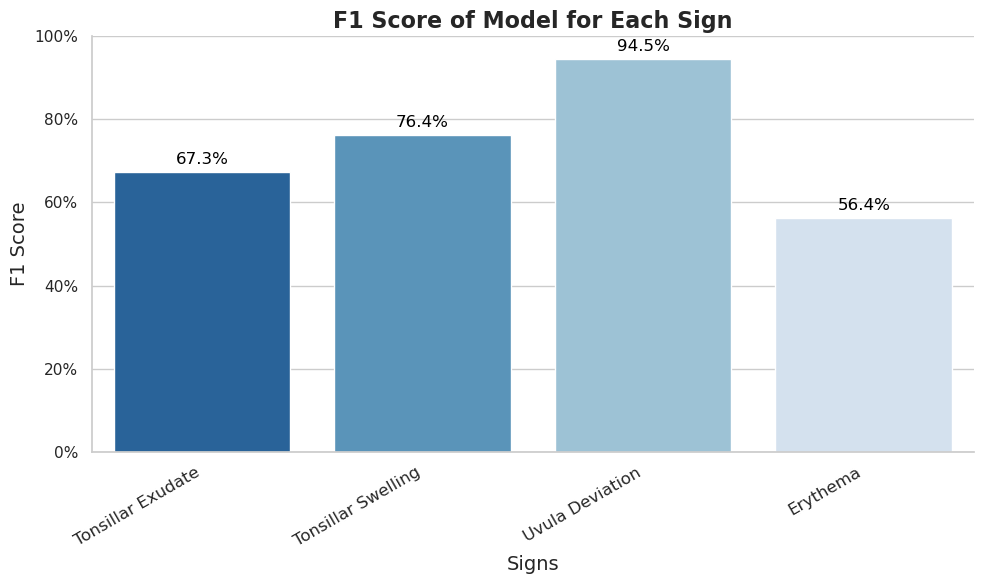

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare data for plotting
signs = list(blip2_accs.keys())
accuracies = list(blip2_accs.values())

# Set the seaborn style and color palette for a professional look
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_r", len(signs))

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=signs, y=accuracies, palette=palette)

# Add title and labels
plt.title("Accuracy of Model for Each Sign", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Signs", fontsize=14)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 9),
                textcoords='offset points')

# Set y-axis limits and format
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Rotate x labels slightly for better readability
plt.xticks(rotation=30, ha="right", fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


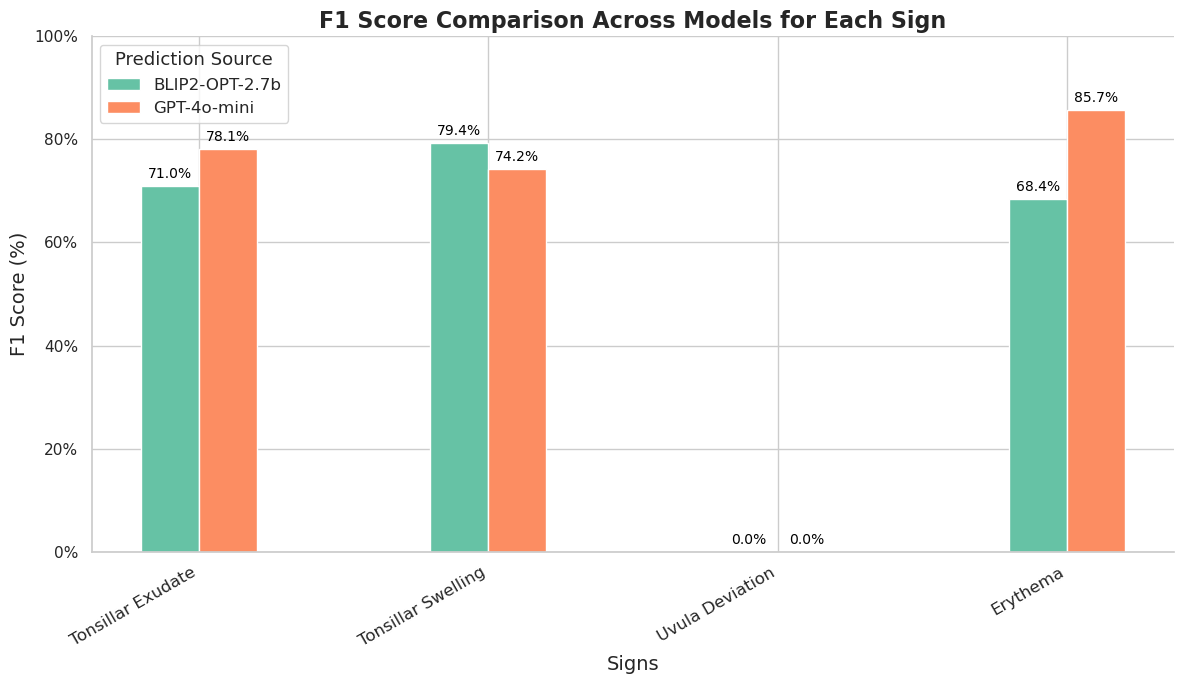

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example accuracy data from different prediction sources
# Replace with actual calculated accuracies from your files

# List of prediction sources (files or methods)
sources = ["BLIP2-OPT-2.7b", "GPT-4o-mini"]

# Prepare data for plotting
signs = list(combined_results.keys())
accuracies = np.array(list(combined_results.values()))  # Convert to numpy array for easier indexing

# Set figure size and seaborn style
f = plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Number of bars in each group (number of sources)
num_sources = len(sources)

# Set the positions and width for the bars
bar_width = 0.2
index = np.arange(len(signs))

# Define color palette
palette = sns.color_palette("Set2", num_sources)

# Create bars for each prediction source
for i in range(num_sources):
    plt.bar(index + i * bar_width, accuracies[:, i], bar_width, label=sources[i], color=palette[i])

# Add title and labels
plt.title("F1 Score Comparison Across Models for Each Sign", fontsize=16, fontweight='bold')
plt.ylabel("F1 Score (%)", fontsize=14)
plt.xlabel("Signs", fontsize=14)

# Add x-ticks and format
plt.xticks(index + bar_width * (num_sources - 1) / 2, signs, rotation=30, ha="right", fontsize=12)

# Add values on top of each bar
for i in range(num_sources):
    for j in range(len(signs)):
        plt.text(index[j] + i * bar_width, accuracies[j, i] + 0.01, f'{accuracies[j, i] * 100:.1f}%', 
                 ha='center', va='bottom', fontsize=10, color='black')

# Set y-axis limits and format
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Remove the top and right spines for a cleaner look
sns.despine()

# Add legend
plt.legend(title="Prediction Source", loc="upper left", fontsize=12, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


In [128]:
f.savefig("sign_f1_score.pdf")